## Step 1: Data Import and Cleaning

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#load the dataset from the CSV file into a Pandas DataFrame.
df = pd.read_csv("starbucks_drinkMenu_expanded.csv")

# data cleaning

#we clean the data by removing any duplicate rows.
df = df.drop_duplicates()

#We print the data types of each column and the names of the columns.

print(df.dtypes)  # Print data types of each column
print(df.columns)  # Print column names

#We check for any null values in each column.
print(df.isnull().sum())  # Check for null values in each column

# Remove extra whitespace before and after column names
df.columns = df.columns.str.strip()

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object
Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calc

## Step 2: Data Exploration

Plot Beverage_category
WordCloud
Q1.Which Starbucks drink has the highest calories from the dataset?
Q2. Which drink has the highest calories from the Starbucks classic espresso drinks?
Q3. Highest Sugar Drink at Starbucks?
Q4. Highest Sugar Drink from Signature Espresso Drinks?
Q5. Which drink has the most calories from the Starbucks TazoÂ® Tea Drinks drinks?
Q6. Signature Espresso Drinks vs TazoÂ® Tea Drinks calories
Q7. Plot Historgram
Q8. Get Correlation between different variables
    Calories vs Sugars
    Caloreis vs Total Carbohydrates
    Calories vs Total Fat
Q9. Map of Correlation betweeen Different Variables

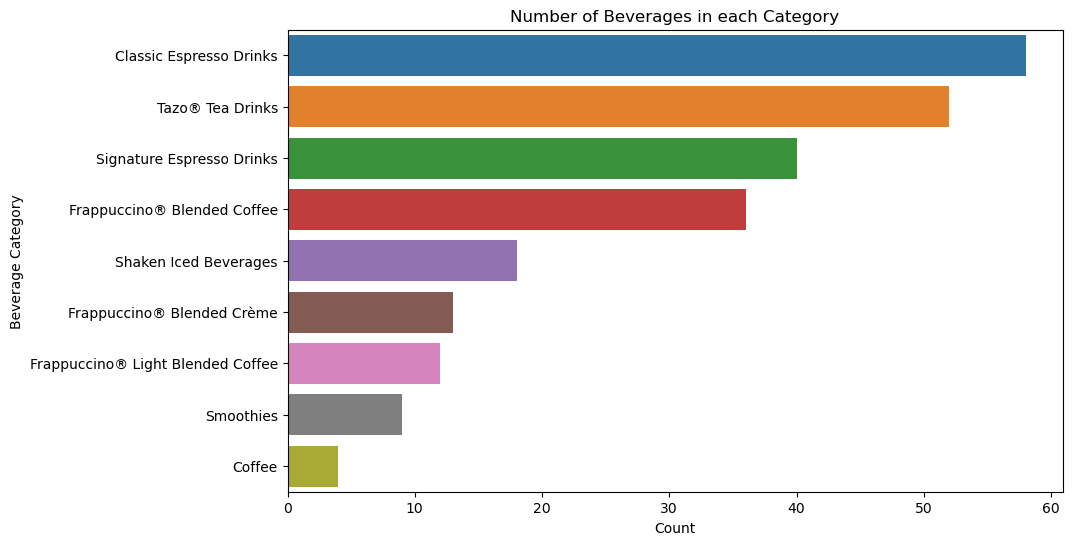

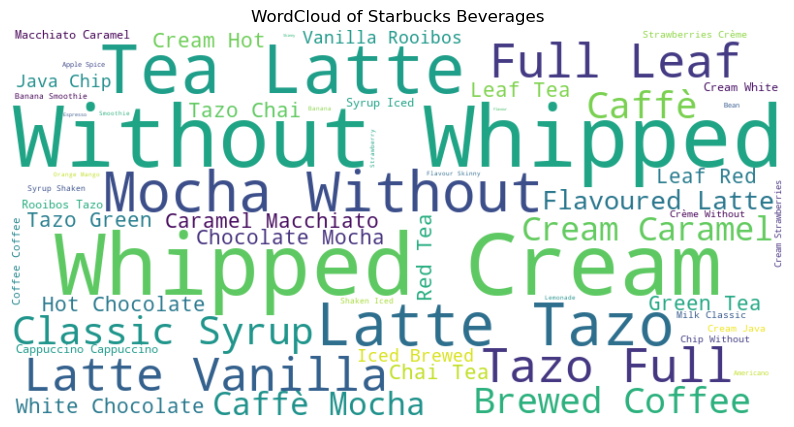

Drink with the highest calories: White Chocolate Mocha (Without Whipped Cream)
Highest calorie classic espresso drink: Caffè Mocha (Without Whipped Cream)
Drink with the highest sugar content: Java Chip (Without Whipped Cream)
Highest sugar signature espresso drink: Caramel Apple Spice (Without Whipped Cream)
Highest calorie Tazo tea drink: Tazo® Green Tea Latte


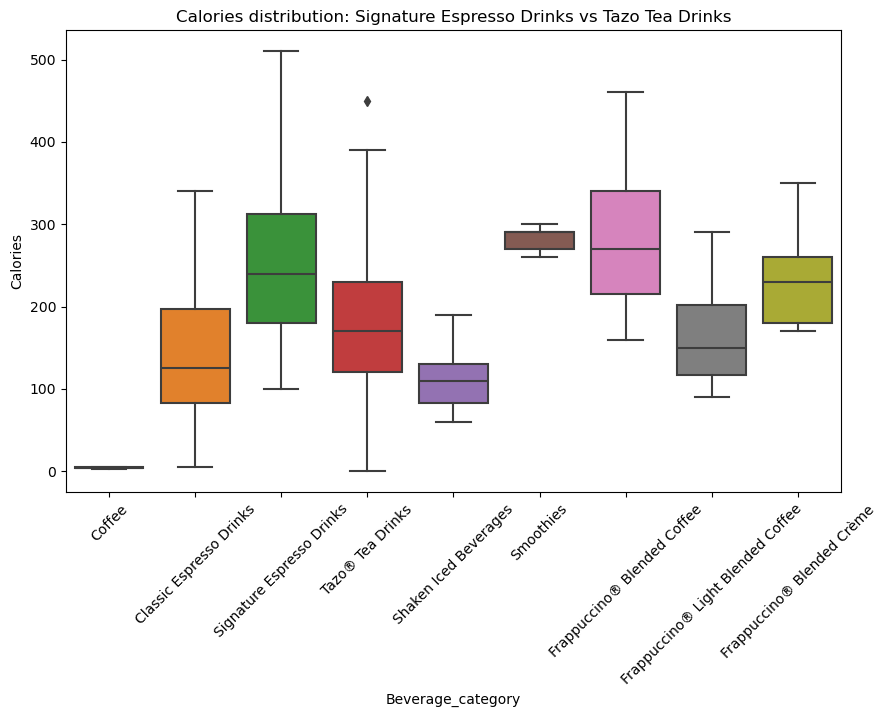

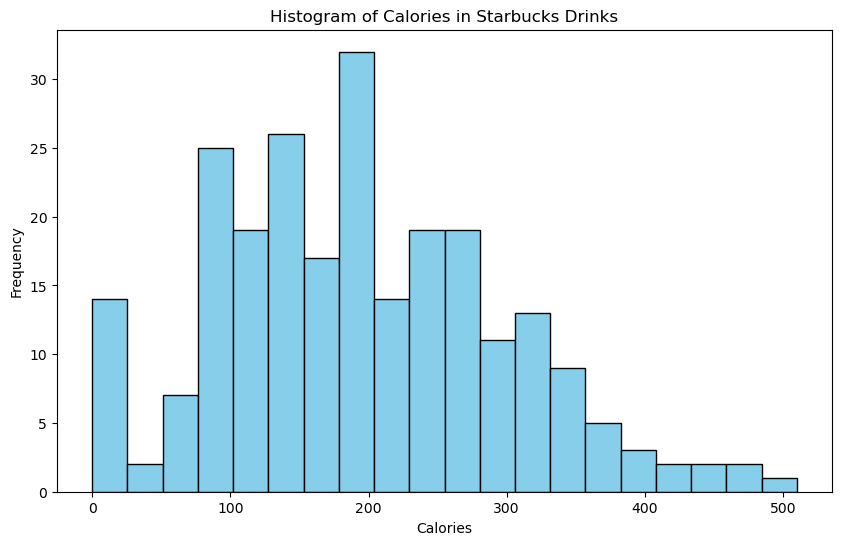

Correlation between different variables:
                         Calories  Sugars (g)  Total Carbohydrates (g)
Calories                 1.000000    0.909675                 0.795037
Sugars (g)               0.909675    1.000000                 0.771407
Total Carbohydrates (g)  0.795037    0.771407                 1.000000


C:\Users\Aditi\AppData\Local\Temp\ipykernel_12172\3098528732.py:61: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df[['Calories', 'Sugars (g)', 'Total Carbohydrates (g)', 'Total Fat (g)']].corr()


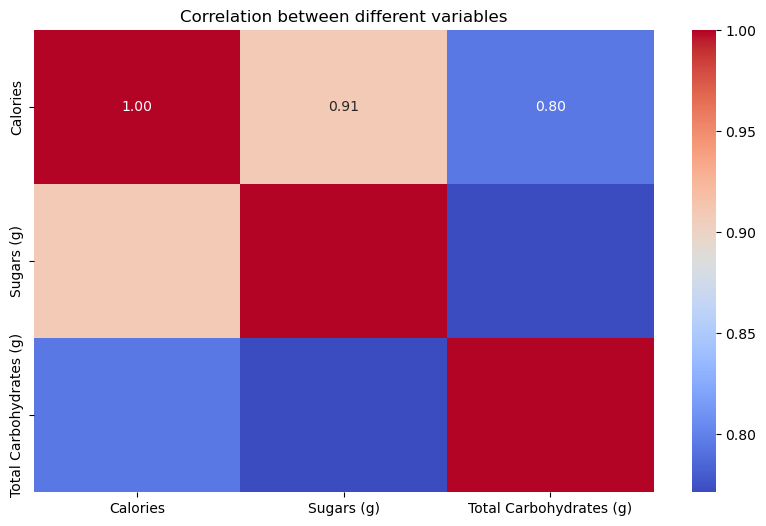

In [19]:
# Step 2: Data Exploration

# Plot Beverage_category
plt.figure(figsize=(10, 6))
sns.countplot(y='Beverage_category', data=df, order=df['Beverage_category'].value_counts().index)
plt.title('Number of Beverages in each Category')
plt.xlabel('Count')
plt.ylabel('Beverage Category')
plt.show()

# WordCloud
wordcloud_text = ' '.join(df['Beverage'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud of Starbucks Beverages')
plt.axis('off')
plt.show()

# Q1. Which Starbucks drink has the highest calories from the dataset?
highest_calorie_drink = df.loc[df['Calories'].idxmax()]
print("Drink with the highest calories:", highest_calorie_drink['Beverage'])

# Q2. Which drink has the highest calories from the Starbucks classic espresso drinks?
classic_espresso = df[df['Beverage_category'] == 'Classic Espresso Drinks']
highest_calorie_classic_espresso = classic_espresso.loc[classic_espresso['Calories'].idxmax()]['Beverage']
print("Highest calorie classic espresso drink:", highest_calorie_classic_espresso)

# Q3. Highest Sugar Drink at Starbucks?
highest_sugar_drink = df.loc[df['Sugars (g)'].idxmax()]
print("Drink with the highest sugar content:", highest_sugar_drink['Beverage'])

# Q4. Highest Sugar Drink from Signature Espresso Drinks?
signature_espresso = df[df['Beverage_category'] == 'Signature Espresso Drinks']
highest_sugar_signature_espresso = signature_espresso.loc[signature_espresso['Sugars (g)'].idxmax()]['Beverage']
print("Highest sugar signature espresso drink:", highest_sugar_signature_espresso)

# Q5. Which drink has the most calories from the Starbucks TazoÂ® Tea Drinks drinks?
tazo_tea_drinks = df[df['Beverage_category'] == 'Tazo® Tea Drinks']
highest_calorie_tazo_tea_drink = tazo_tea_drinks.loc[tazo_tea_drinks['Calories'].idxmax()]['Beverage']
print("Highest calorie Tazo tea drink:", highest_calorie_tazo_tea_drink)

# Q6. Signature Espresso Drinks vs TazoÂ® Tea Drinks calories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Beverage_category', y='Calories', data=df)
plt.title('Calories distribution: Signature Espresso Drinks vs Tazo Tea Drinks')
plt.xticks(rotation=45)
plt.show()

# Q7. Plot Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Calories'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Calories in Starbucks Drinks')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()



# Get Correlation between different variables
correlation = df[['Calories', 'Sugars (g)', 'Total Carbohydrates (g)', 'Total Fat (g)']].corr()
print("Correlation between different variables:")
print(correlation)


# Q9. Map of Correlation between Different Variables
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between different variables')
plt.show()

## Step 3: Summarize

In [13]:
# Conclusion
print("\nIn conclusion, through data exploration, we have analyzed various aspects of the Starbucks drink menu dataset.")
print("We identified the beverages with the highest calories and sugar content, as well as explored calorie distributions across different beverage categories.")
print("Additionally, we visualized correlations between calories and other nutritional components such as sugars, total carbohydrates, and total fat.")
print("These insights can inform consumers and Starbucks alike about the nutritional composition of their beverages.")


In conclusion, through data exploration, we have analyzed various aspects of the Starbucks drink menu dataset.
We identified the beverages with the highest calories and sugar content, as well as explored calorie distributions across different beverage categories.
Additionally, we visualized correlations between calories and other nutritional components such as sugars, total carbohydrates, and total fat.
These insights can inform consumers and Starbucks alike about the nutritional composition of their beverages.
